To show the dataset and the decision boundary made by the Perceptron model, we'll use a 2D plot. But, because the breast cancer dataset has more than two features, we can't directly plot it as is. First, we need to simplify the data to just two dimensions using PCA (Principal Component Analysis). After that, we'll train the Perceptron model on this simplified data and then create a plot showing both the data points and the decision boundary.

Step 1: Import necessary libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

Step 2: Load the dataset


In [11]:
data = load_breast_cancer()
X = data.data
y = data.target

Step 3: Reduce the dataset to 2 dimensions using PCA

In [12]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

Step 4: Split the 2D dataset into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

Step 5: Create and train the Perceptron model (basic linear classifier)

In [14]:
classifier = Perceptron(tol=1e-3, random_state=42)
classifier.fit(X_train, y_train)

Perceptron(random_state=42)

Step 6: Make predictions on the test set

In [15]:
y_pred = classifier.predict(X_test)

Step 7: Evaluate the model using various metrics


In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0
F1 Score: 0.9594594594594594


Step 8: Display the Confusion Matrix

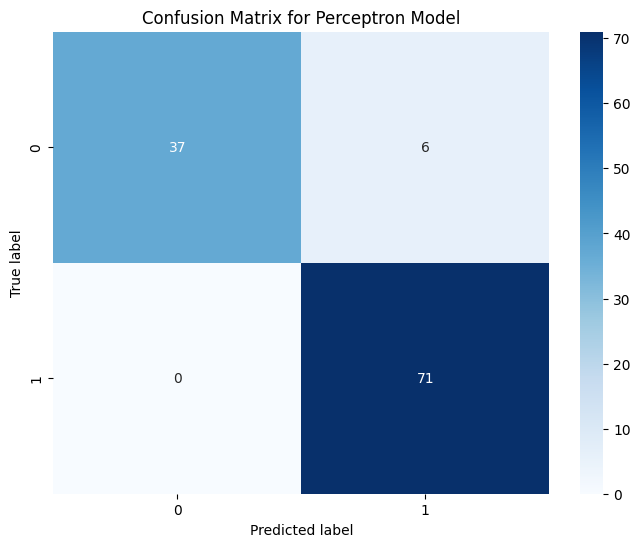

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Perceptron Model')
plt.show()

Step 9: Visualize the data and the decision boundary

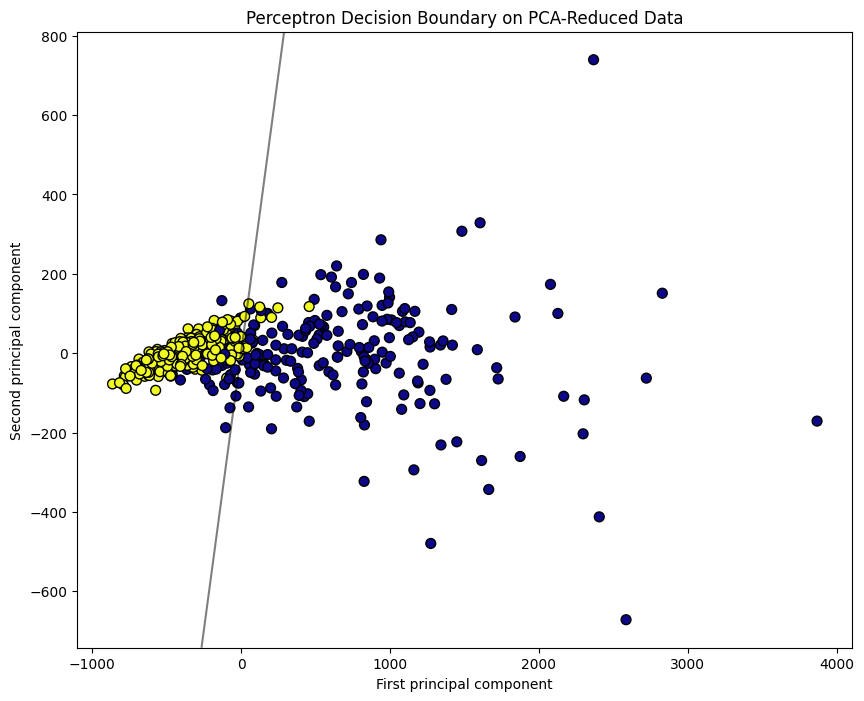

In [18]:
plt.figure(figsize=(10, 8))
# Plot the data points
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='plasma', s=50, edgecolor='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Perceptron Decision Boundary on PCA-Reduced Data')
plt.show()